# Proyek Klasifikasi Gambar: Math Symbol
- **Nama:** Muhammad Alif
- **Email:** m.alif7890@gmail.com
- **ID Dicoding:** miezlearning

## Import Semua Packages/Library yang Digunakan

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Dicoding/Angka'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preparation

In [3]:
# Tidak ada preprocessing resolusi (mengikuti saran)
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi piksel
    validation_split=0.2  # 20% untuk validasi
)

# Train dan Validation Generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),  # Ukuran input model
    batch_size=32,
    class_mode='categorical',
    subset='training'  # 70% untuk training
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # 20% untuk validasi
)

# Test Generator (10% dari dataset)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 8065 images belonging to 19 classes.
Found 2006 images belonging to 19 classes.
Found 10071 images belonging to 19 classes.


### Data Preprocessing

Kita akan menggunakan `tf.keras.utils.image_dataset_from_directory` untuk memuat gambar. Fungsi ini secara otomatis:
1.  Mengambil gambar dari subdirektori.
2.  Memberi label sesuai nama subdirektori.
3.  Mengubah ukuran gambar ke ukuran yang seragam (mengatasi resolusi tidak seragam).
4.  Membagi data menjadi set pelatihan dan validasi.
5.  Membuat batch data.

## Modelling

Kita akan membangun model Sequential Convolutional Neural Network (CNN).
Model ini akan mencakup:
- Lapisan `Rescaling` untuk normalisasi piksel gambar (0-255 menjadi 0-1).
- Beberapa lapisan Konvolusi (`Conv2D`) dan Pooling (`MaxPooling2D`) untuk ekstraksi fitur.
- Lapisan `Flatten` untuk mengubah data fitur menjadi vektor 1D.
- Beberapa lapisan `Dense` (fully connected).
- Lapisan `Dropout` untuk mengurangi overfitting.
- Lapisan output `Dense` dengan aktivasi `softmax` untuk klasifikasi multi-kelas.

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Mencegah overfitting
    Dense(19, activation='softmax')  # 19 kelas
])

# Kompilasi Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Tampilkan ringkasan model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 19)             │         2,451 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,651 (2.62 MB)

 Trainable params: 685,651 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

#### Callbacks
Mengimplementasikan callbacks untuk:
1.  `ModelCheckpoint`: Menyimpan model terbaik selama training berdasarkan akurasi validasi.
2.  `EarlyStopping`: Menghentikan training jika tidak ada peningkatan signifikan pada akurasi validasi untuk beberapa epoch.


In [5]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True
)



#### Training Model

In [6]:
# 6. Latih Model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2618 - loss: 2.3914

253/253 ━━━━━━━━━━━━━━━━━━━━ 739s 3s/step - accuracy: 0.2624 - loss: 2.3894 - val_accuracy: 0.7836 - val_loss: 0.7960
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6879 - loss: 1.0030

253/253 ━━━━━━━━━━━━━━━━━━━━ 36s 126ms/step - accuracy: 0.6881 - loss: 1.0025 - val_accuracy: 0.8928 - val_loss: 0.3847
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7978 - loss: 0.6122

253/253 ━━━━━━━━━━━━━━━━━━━━ 33s 129ms/step - accuracy: 0.7978 - loss: 0.6121 - val_accuracy: 0.9118 - val_loss: 0.2788
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8560 - loss: 0.4571

253/253 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.8560 - loss: 0.4571 - val_accuracy: 0.9297 - val_loss: 0.2368
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8935 - loss: 0.3264

253/253 ━━━━━━━━━━━━━━━━━━━━ 32s 128ms/step - accuracy: 0.8935 - loss: 0.3264 - val_accuracy: 0.9327 - val_loss: 0.2113
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9130 - loss: 0.2684

253/253 ━━━━━━━━━━━━━━━━━━━━ 32s 126ms/step - accuracy: 0.9130 - loss: 0.2684 - val_accuracy: 0.9477 - val_loss: 0.1746
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - accuracy: 0.9241 - loss: 0.2250 - val_accuracy: 0.9347 - val_loss: 0.2035
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9341 - loss: 0.1989

253/253 ━━━━━━━━━━━━━━━━━━━━ 32s 128ms/step - accuracy: 0.9341 - loss: 0.1988 - val_accuracy: 0.9626 - val_loss: 0.1267
Epoch 9/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 33s 129ms/step - accuracy: 0.9420 - loss: 0.1692 - val_accuracy: 0.9621 - val_loss: 0.1345
Epoch 10/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.9479 - loss: 0.1473 - val_accuracy: 0.9596 - val_loss: 0.1402
Epoch 11/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9525 - loss: 0.1346

253/253 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - accuracy: 0.9525 - loss: 0.1345 - val_accuracy: 0.9631 - val_loss: 0.1248
Epoch 12/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 33s 129ms/step - accuracy: 0.9627 - loss: 0.1047 - val_accuracy: 0.9601 - val_loss: 0.1362
Epoch 13/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 33s 131ms/step - accuracy: 0.9644 - loss: 0.1054 - val_accuracy: 0.9611 - val_loss: 0.1280
Epoch 14/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 32s 126ms/step - accuracy: 0.9636 - loss: 0.1069 - val_accuracy: 0.9571 - val_loss: 0.1563
Epoch 15/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9680 - loss: 0.0960

253/253 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - accuracy: 0.9680 - loss: 0.0960 - val_accuracy: 0.9681 - val_loss: 0.1371
Epoch 16/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 32s 128ms/step - accuracy: 0.9711 - loss: 0.0850 - val_accuracy: 0.9626 - val_loss: 0.1529
Epoch 17/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - accuracy: 0.9751 - loss: 0.0721 - val_accuracy: 0.9631 - val_loss: 0.1786
Epoch 18/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 32s 126ms/step - accuracy: 0.9708 - loss: 0.0748 - val_accuracy: 0.9671 - val_loss: 0.1383
Epoch 19/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 37s 145ms/step - accuracy: 0.9742 - loss: 0.0795 - val_accuracy: 0.9611 - val_loss: 0.1566
Epoch 20/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 37s 129ms/step - accuracy: 0.9786 - loss: 0.0677 - val_accuracy: 0.9671 - val_loss: 0.1436


## Evaluasi dan Visualisasi

315/315 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.9892 - loss: 0.0412
Akurasi pada test set: 99.30%


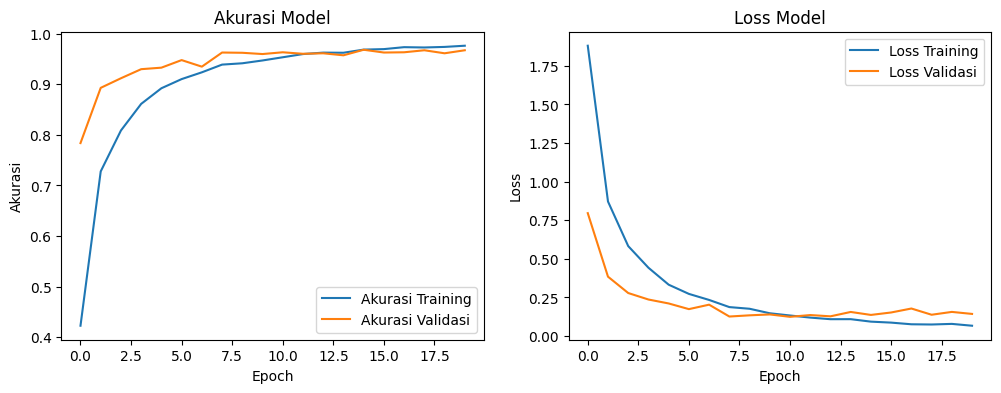

In [8]:
#Evaluasi pada Test Set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Akurasi pada test set: {test_accuracy*100:.2f}%")

# Plot Akurasi dan Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Konversi Model

In [36]:
from google.colab import files

os.makedirs('/content/saved_model', exist_ok=True)
os.makedirs('/content/tflite', exist_ok=True)
os.makedirs('/content/tfjs_model', exist_ok=True)

# a. SavedModel
saved_model_path = '/content/saved_model'
model.export(saved_model_path)
print(f"Model berhasil disimpan dalam format SavedModel di: {saved_model_path}")

# b. TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
tflite_path = '/content/tflite/model.tflite'
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)

# Buat file label.txt untuk TF-Lite
class_names = list(train_generator.class_indices.keys())
label_path = '/content/tflite/label.txt'
with open(label_path, 'w') as f:
    for label in class_names:
        f.write(f"{label}\n")
print(f"Model dan label berhasil disimpan dalam format TF-Lite di: /content/tflite")

# c. TFJS
!pip install tensorflowjs -q
import tensorflowjs as tfjs

tfjs_model_path = '/content/tfjs_model'
tfjs.converters.save_keras_model(model, tfjs_model_path)
print(f"Model berhasil disimpan dalam format TFJS di: {tfjs_model_path}")

# 9. Kompres dan Unduh Model Otomatis
zip_path = '/content/models.zip'
!zip -r {zip_path} /content/saved_model /content/tflite /content/tfjs_model
print(f"Semua model dikompresi ke: {zip_path}")

# Unduh file zip otomatis
files.download(zip_path)

Saved artifact at '/content/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 19), dtype=tf.float32, name=None)
Captures:
  138521433390928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138521407865488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138521407865104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138521407868368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138521407867600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138521407869328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138521407868752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138521407869712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138521407870096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138521407871632: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model berhasi

failed to lookup keras version from the file,
    this is likely a weight only file
Model berhasil disimpan dalam format TFJS di: /content/tfjs_model
  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/saved_model.pb (deflated 85%)
  adding: content/saved_model/fingerprint.pb (stored 0%)
  adding: content/saved_model/assets/ (stored 0%)
  adding: content/saved_model/variables/ (stored 0%)
  adding: content/saved_model/variables/variables.index (deflated 62%)
  adding: content/saved_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/tflite/ (stored 0%)
  adding: content/tflite/model.tflite (deflated 7%)
  adding: content/tflite/label.txt (stored 0%)
  adding: content/tfjs_model/ (stored 0%)
  adding: content/tfjs_model/model.json (deflated 85%)
  adding: content/tfjs_model/group1-shard1of1.bin (deflated 7%)
Semua model dikompresi ke: /content/models.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Inference (Optional)

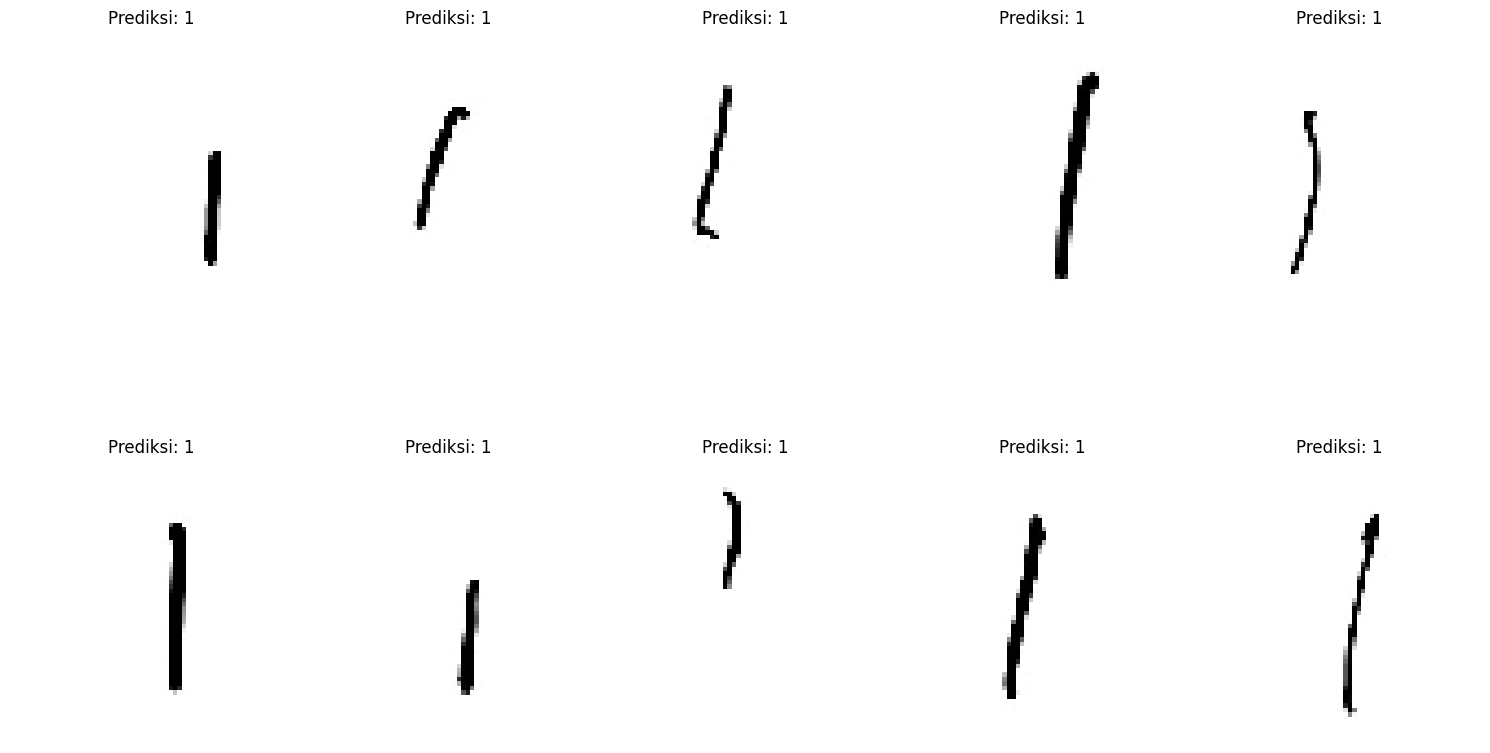

In [32]:
interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

jml_gambar = 10
sample_images, sample_labels = next(test_generator)
sample_images = sample_images[:jml_gambar]

predictions = []
class_names = list(train_generator.class_indices.keys())

for i in range(jml_gambar):
    input_image = np.expand_dims(sample_images[i], axis=0)
    interpreter.set_tensor(input_details[0]['index'], input_image)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_class = np.argmax(output_data[0])
    predictions.append(class_names[predicted_class])

plt.figure(figsize=(15, 10))
for i in range(jml_gambar):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"Prediksi: {predictions[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [38]:
!pip freeze > /content/requirements.txt